<a href="https://colab.research.google.com/github/GenSKNeo/Decision-Intelligence-Dashboard/blob/main/m14w16_sat_live_session_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Data Loading & Exploration** 📁
```
Raw Data → Shape: (10000, 14)
├── CustomerId, Surname, CreditScore
├── Geography, Gender, Age, Tenure
├── Balance, NumOfProducts, HasCrCard
├── IsActiveMember, EstimatedSalary
└── 🎯 TARGET: Exited (Churn Flag)

Tenure should be the length of service

```

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('Banking_Modelling.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset Shape: (10000, 14)

First few rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1 

Dataset Shape: (10000, 14)

First few rows:
   RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602   Hargrave          619    France  Female   42       2       0.00              1          1               1       101348.88       1
1          2    15647311       Hill          608     Spain  Female   41       1   83807.86              1          0               1       112542.58       0

#***Data Loading & Exploration Learning Seccession:***

In [26]:
# Load the data
df = pd.read_csv('Banking_Modelling.csv')

print("Dateset Shape:", df.shape)
print("\nFirst few rows")
print(df.head())
df.head()

Dateset Shape: (10000, 14)

First few rows
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Data Quality Check
```python
# Quality Metrics
Missing Values: 0 ✅
Duplicates: 0 ✅
Data Types: Appropriate ✅
Churn Rate: 20.4% ⚠️
Churn is the rate at which customers stop doing business
```

#***Data Quality Check Learning Seccession:***

In [53]:
print(" ======= Data Quality Check ======= ")
print("\n------- Data Types: -------")
print(df.dtypes)
print("\n ------- Missing Values: ------- ")
print(df.isnull().sum())  # without sum() show True or False
print("\n ------- Duplicates: ------- ")
print(df.duplicated().sum())
print("\n ======= Basic Statistics ======= ")
print(df.describe())


 ======= Data Quality Check ======= 

------- Data Types: -------
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

 ------- Missing Values: ------- 
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 ------- Duplicates: ------- 
0

 ======= Basic Statistics ======= 
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000

In [27]:
print("=== DATA QUALITY CHECK ===")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

print("\n=== BASIC STATISTICS ===")
print(df.describe())

=== DATA QUALITY CHECK ===

Data Types:
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Duplicate Rows: 0

=== BASIC STATISTICS ===
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528

**Observations:**
- No missing values
- No duplicates
- Data types are appropriate
- Dataset is clean and ready for analysis

## 3. Exploratory Data Analysis (EDA)

### **3. Exploratory Data Analysis** 📊
```
Key Visualizations:
├── 📈 Churn Distribution
├── 🌍 Geography Impact
├── ⚥ Gender Analysis
├── 📊 Age Distribution
├── 💳 Credit Score Patterns
└── 🔗 Correlation Matrix
```

### Target Variable Distribution

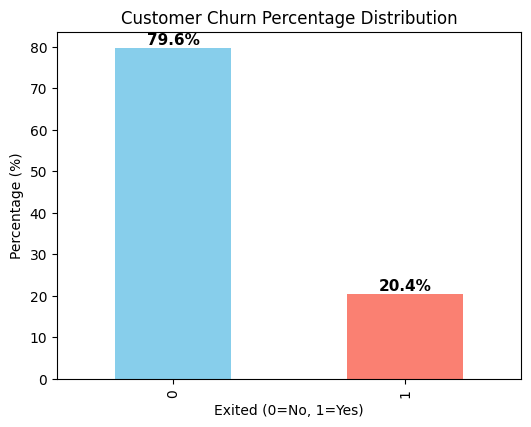

In [58]:
plt.figure(figsize=(15, 12))

# 1️⃣ Target distribution — show percentage instead of count
plt.subplot(3, 3, 1)

# Calculate percentage distribution
churn_pct = df['Exited'].value_counts(normalize=True) * 100

# Plot as bar chart
churn_pct.plot(kind='bar', color=['skyblue', 'salmon'])

# Add percentage labels on top of bars
for i, val in enumerate(churn_pct):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Titles and labels
plt.title('Customer Churn Percentage Distribution')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


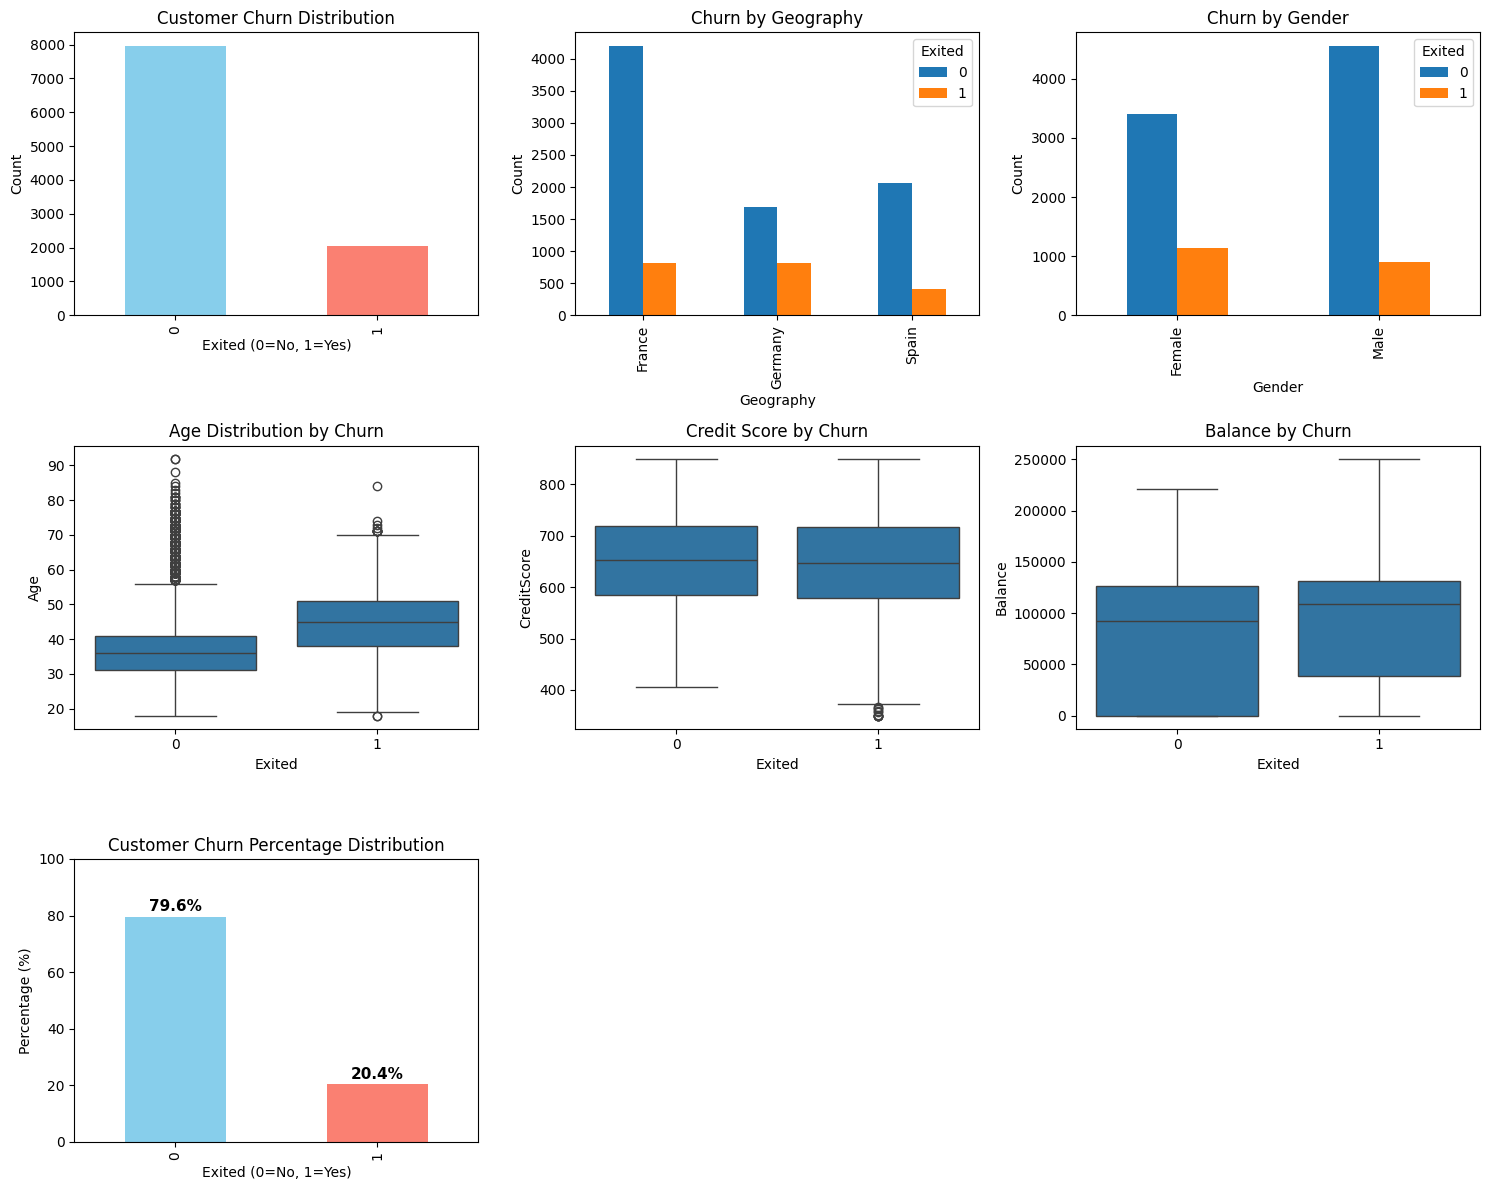

In [62]:
plt.figure(figsize=(15, 12))

# 1. Target distribution - count Exited 0 and 1 in bar chart
plt.subplot(3, 3, 1)
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Count')

# 2. Geography vs Churn
plt.subplot(3, 3, 2)
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', ax=plt.gca())
plt.title('Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')

# 3. Gender vs Churn
plt.subplot(3, 3, 3)
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', ax=plt.gca())
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# 4. Age distribution by churn
plt.subplot(3, 3, 4)
sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age Distribution by Churn')

# 5. Credit Score by churn
plt.subplot(3, 3, 5)
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('Credit Score by Churn')

# 6. Balance by churn
plt.subplot(3, 3, 6)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Balance by Churn')

# 1️⃣ Target distribution — show percentage instead of count
plt.subplot(3, 3, 7)

# Calculate percentage distribution
churn_pct = df['Exited'].value_counts(normalize=True) * 100

# Plot as bar chart
churn_pct.plot(kind='bar', color=['skyblue', 'salmon'])

# Add percentage labels on top of bars
for i, val in enumerate(churn_pct):
    plt.text(i, val + 2, f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# Titles and labels
plt.title('Customer Churn Percentage Distribution')
plt.xlabel('Exited (0=No, 1=Yes)')
plt.ylabel('Percentage (%)')

# Set y-axis limit to leave headroom for labels
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


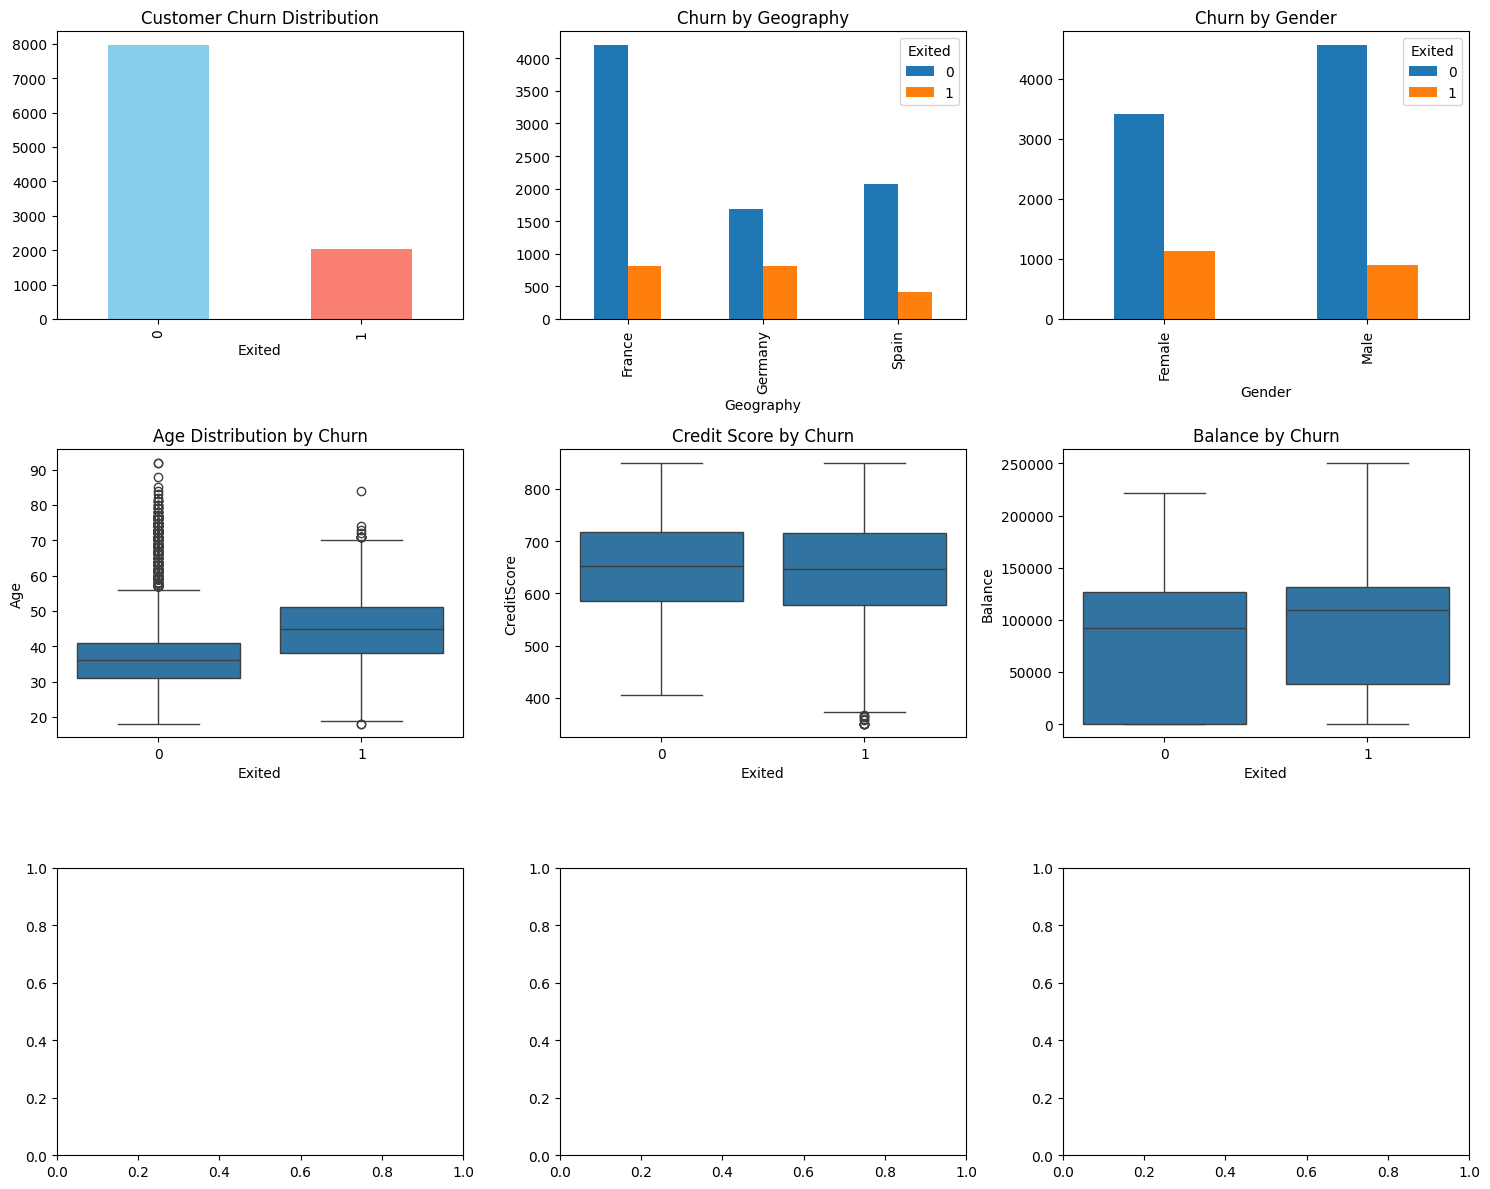

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[0,0])
axes[0,0].set_title('Customer Churn Distribution')

pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Churn by Geography')

pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Churn by Gender')

sns.boxplot(x='Exited', y='Age', data=df, ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Churn')

sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[1,1])
axes[1,1].set_title('Credit Score by Churn')

sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1,2])
axes[1,2].set_title('Balance by Churn')

plt.tight_layout()
plt.show()


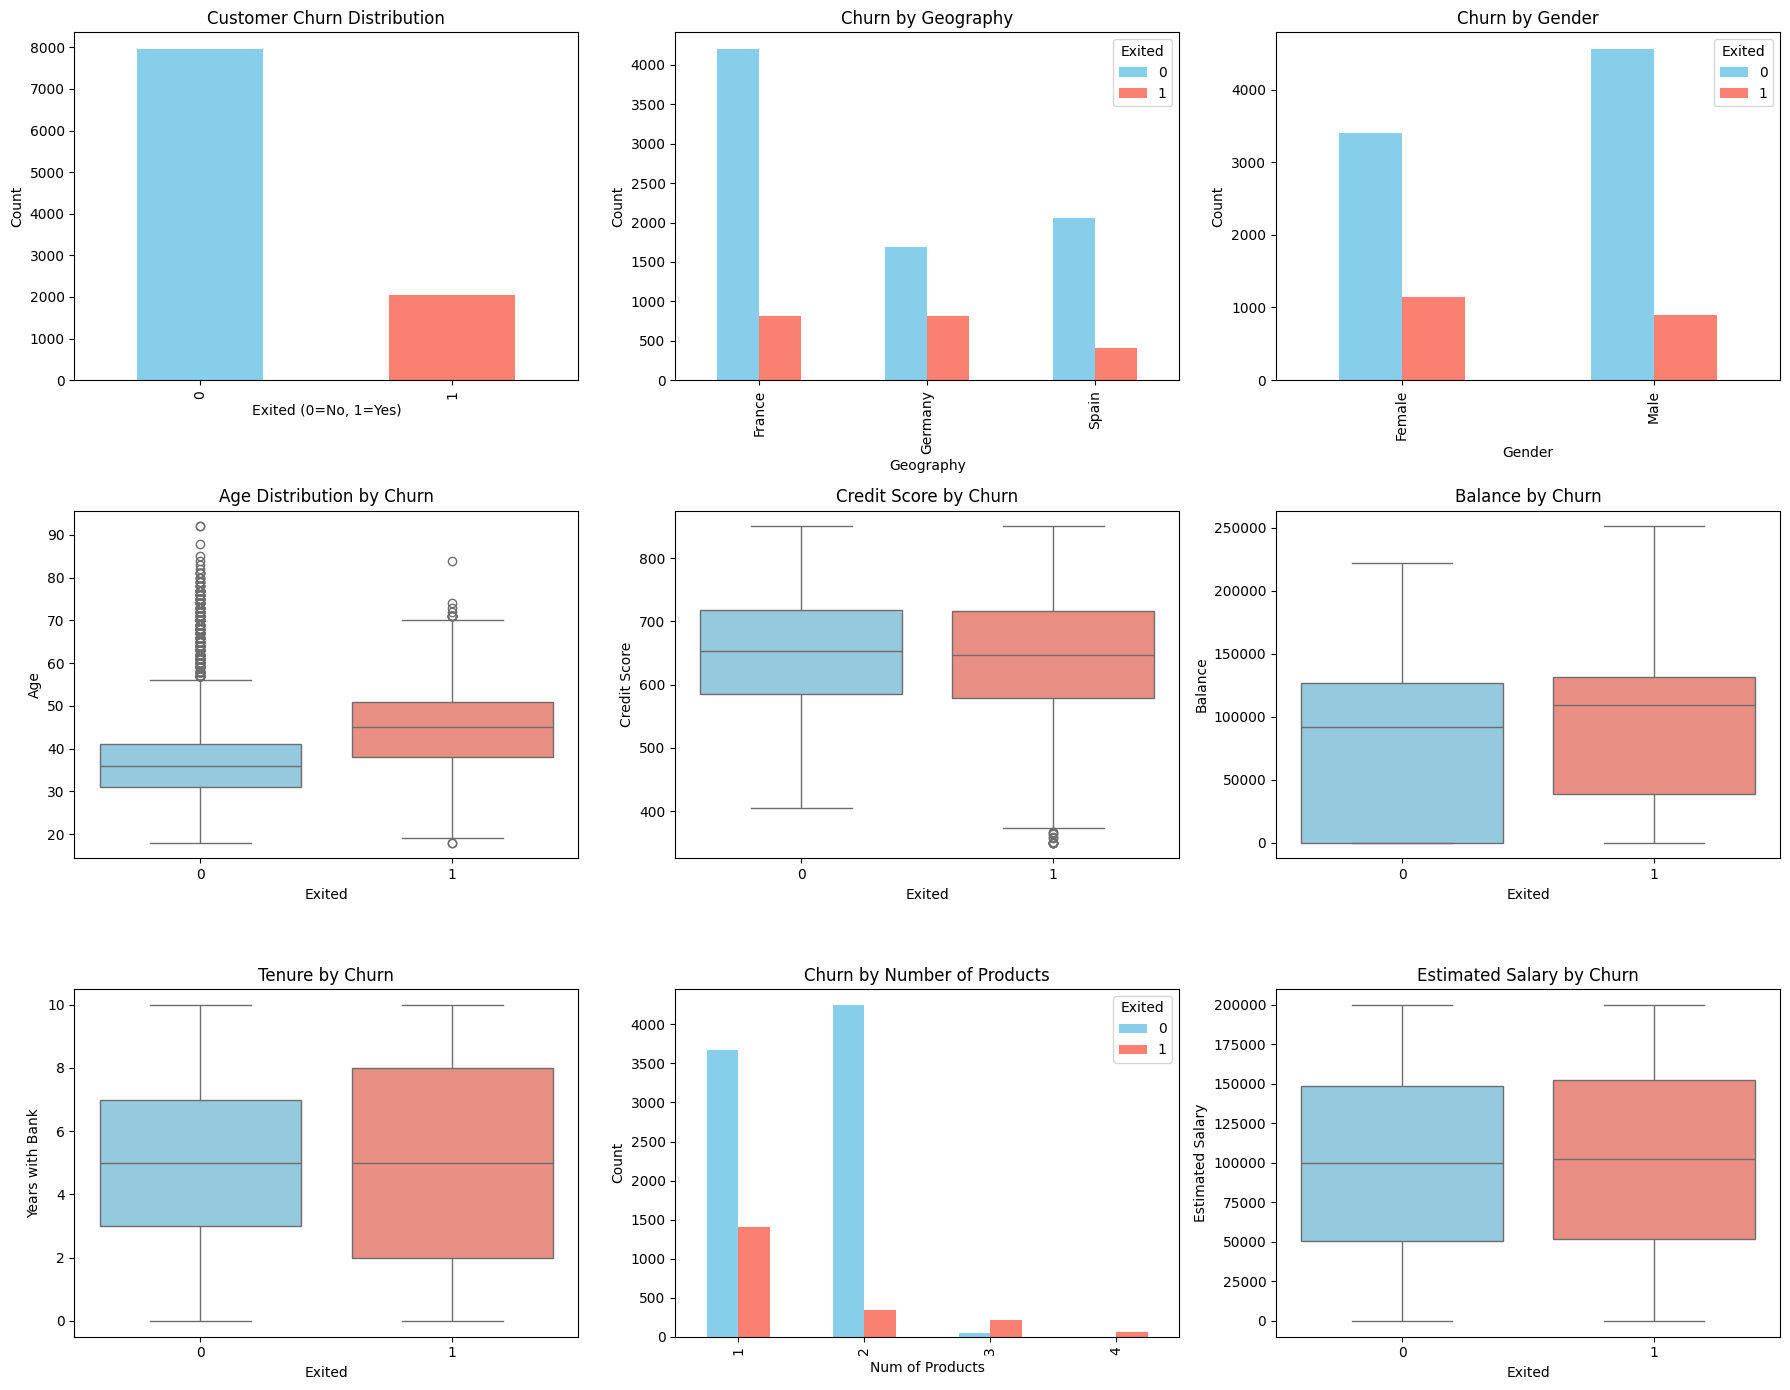

In [57]:
# Create 3x3 figure grid
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# 1️⃣ Target distribution
df['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=axes[0,0])
axes[0,0].set_title('Customer Churn Distribution')
axes[0,0].set_xlabel('Exited (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')

# 2️⃣ Geography vs Churn
pd.crosstab(df['Geography'], df['Exited']).plot(kind='bar', ax=axes[0,1], color=['skyblue', 'salmon'])
axes[0,1].set_title('Churn by Geography')
axes[0,1].set_xlabel('Geography')
axes[0,1].set_ylabel('Count')

# 3️⃣ Gender vs Churn
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', ax=axes[0,2], color=['skyblue', 'salmon'])
axes[0,2].set_title('Churn by Gender')
axes[0,2].set_xlabel('Gender')
axes[0,2].set_ylabel('Count')

# 4️⃣ Age distribution by churn
sns.boxplot(x='Exited', y='Age', data=df, ax=axes[1,0], palette=['skyblue', 'salmon'])
axes[1,0].set_title('Age Distribution by Churn')
axes[1,0].set_xlabel('Exited')
axes[1,0].set_ylabel('Age')

# 5️⃣ Credit Score by churn
sns.boxplot(x='Exited', y='CreditScore', data=df, ax=axes[1,1], palette=['skyblue', 'salmon'])
axes[1,1].set_title('Credit Score by Churn')
axes[1,1].set_xlabel('Exited')
axes[1,1].set_ylabel('Credit Score')

# 6️⃣ Balance by churn
sns.boxplot(x='Exited', y='Balance', data=df, ax=axes[1,2], palette=['skyblue', 'salmon'])
axes[1,2].set_title('Balance by Churn')
axes[1,2].set_xlabel('Exited')
axes[1,2].set_ylabel('Balance')

# 7️⃣ Tenure vs Churn
sns.boxplot(x='Exited', y='Tenure', data=df, ax=axes[2,0], palette=['skyblue', 'salmon'])
axes[2,0].set_title('Tenure by Churn')
axes[2,0].set_xlabel('Exited')
axes[2,0].set_ylabel('Years with Bank')

# 8️⃣ Number of Products vs Churn
pd.crosstab(df['NumOfProducts'], df['Exited']).plot(kind='bar', ax=axes[2,1], color=['skyblue', 'salmon'])
axes[2,1].set_title('Churn by Number of Products')
axes[2,1].set_xlabel('Num of Products')
axes[2,1].set_ylabel('Count')

# 9️⃣ Estimated Salary by Churn
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, ax=axes[2,2], palette=['skyblue', 'salmon'])
axes[2,2].set_title('Estimated Salary by Churn')
axes[2,2].set_xlabel('Exited')
axes[2,2].set_ylabel('Estimated Salary')

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation Analysis

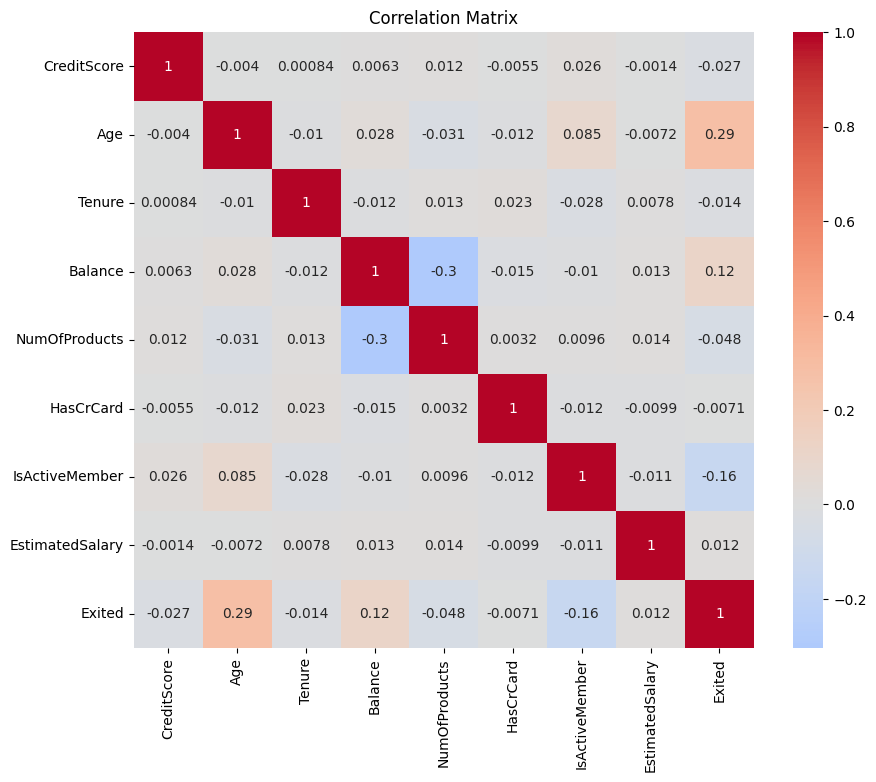

Correlation with Exited:
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [8]:
# Select numerical features for correlation
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

print("Correlation with Exited:")
print(correlation_matrix['Exited'].sort_values(ascending=False))

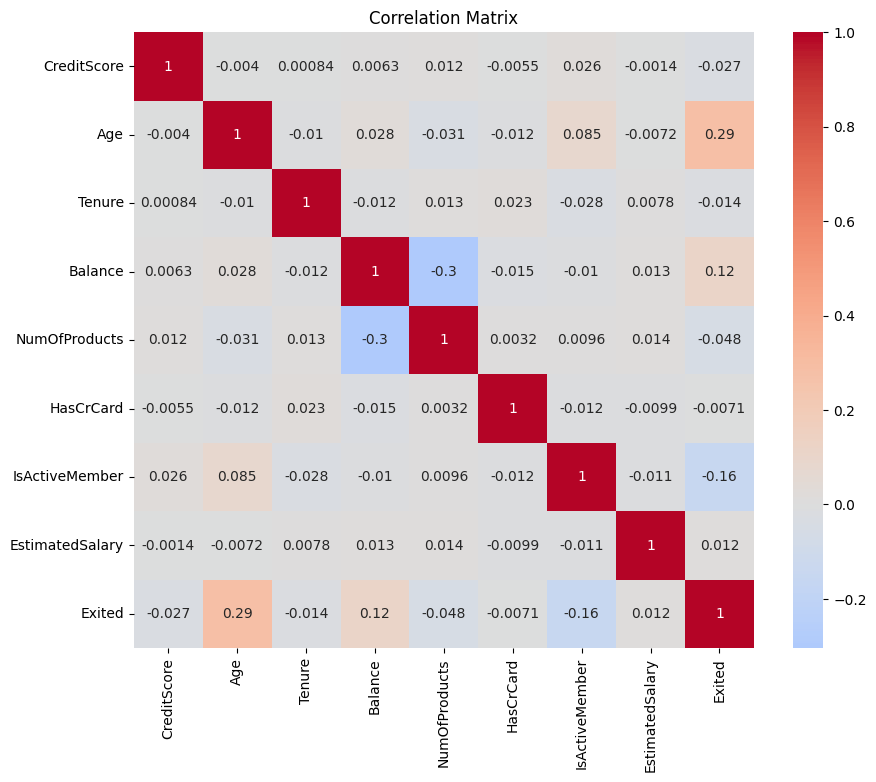

Correlation with Exited:
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [63]:
# 1. Select numeric columns automatically
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 2. Remove irrelevant numeric IDs
numerical_features = [col for col in numerical_features if col not in ['CustomerId', 'RowNumber']]

# 3. Compute correlation
correlation_matrix = df[numerical_features].corr()

# 4. Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 5. Focus on churn correlations
print("Correlation with Exited:")
print(correlation_matrix['Exited'].sort_values(ascending=False))


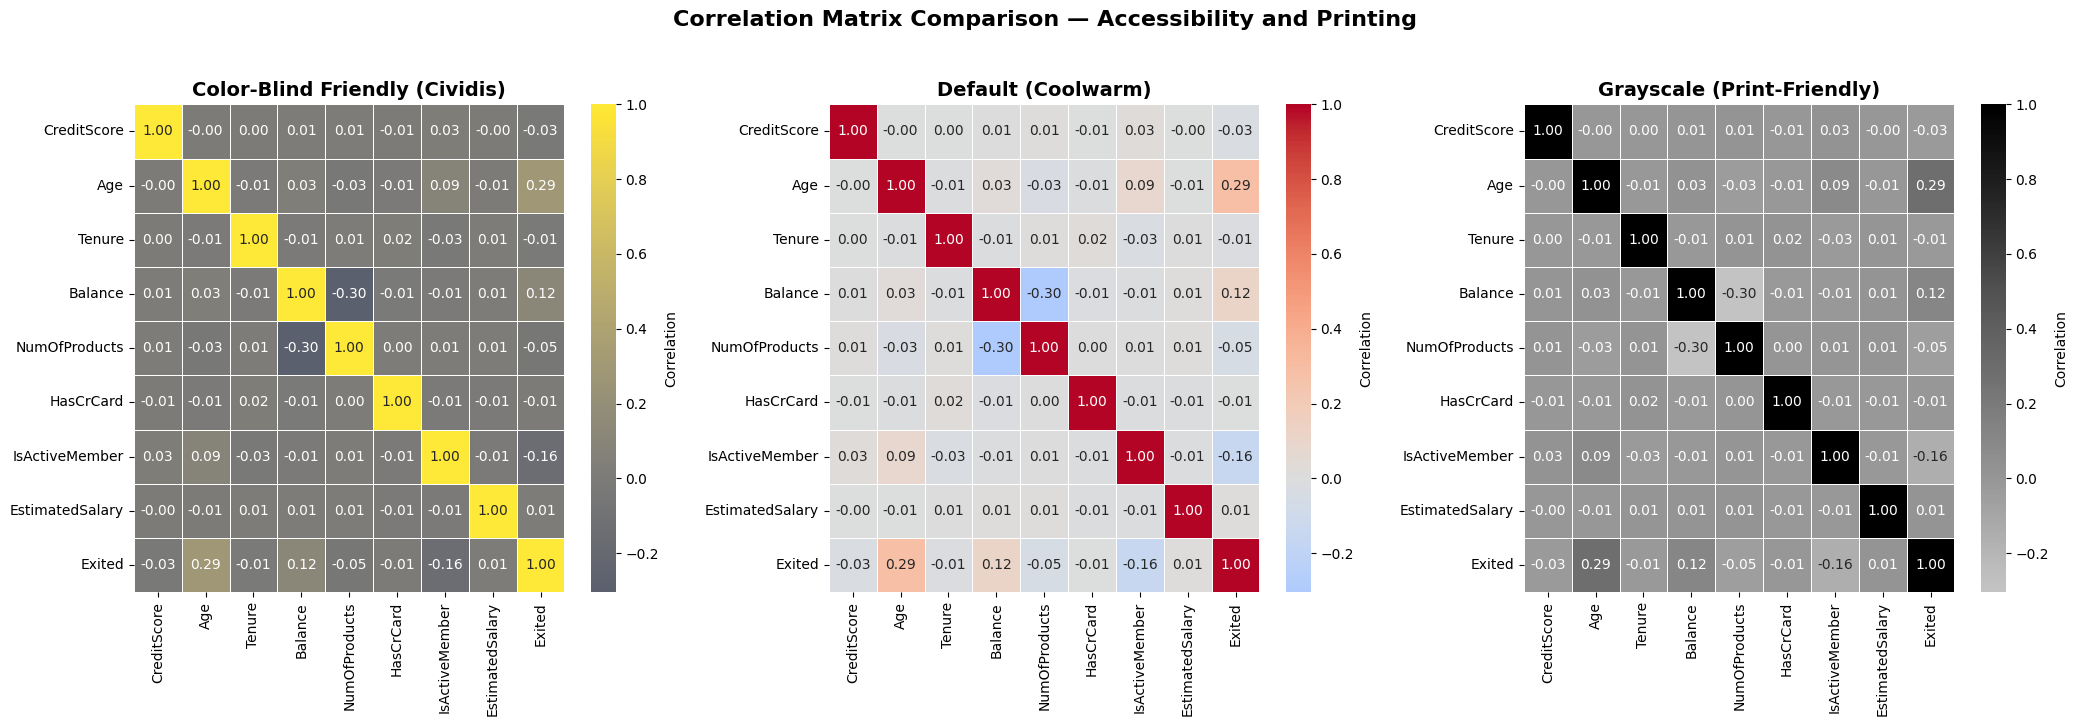

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example numerical features
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'EstimatedSalary', 'Exited'
]

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create 1 row × 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

# Define colormaps to compare
colormaps = ['cividis', 'coolwarm', 'Greys']
titles = [
    'Color-Blind Friendly (Cividis)',
    'Default (Coolwarm)',
    'Grayscale (Print-Friendly)'
]

# Plot each heatmap
for ax, cmap, title in zip(axes, colormaps, titles):
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap=cmap,
        center=0,
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={'label': 'Correlation'},
        ax=ax
    )
    ax.set_title(title, fontsize=14, fontweight='bold')

plt.suptitle('Correlation Matrix Comparison — Accessibility and Printing', fontsize=16, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()


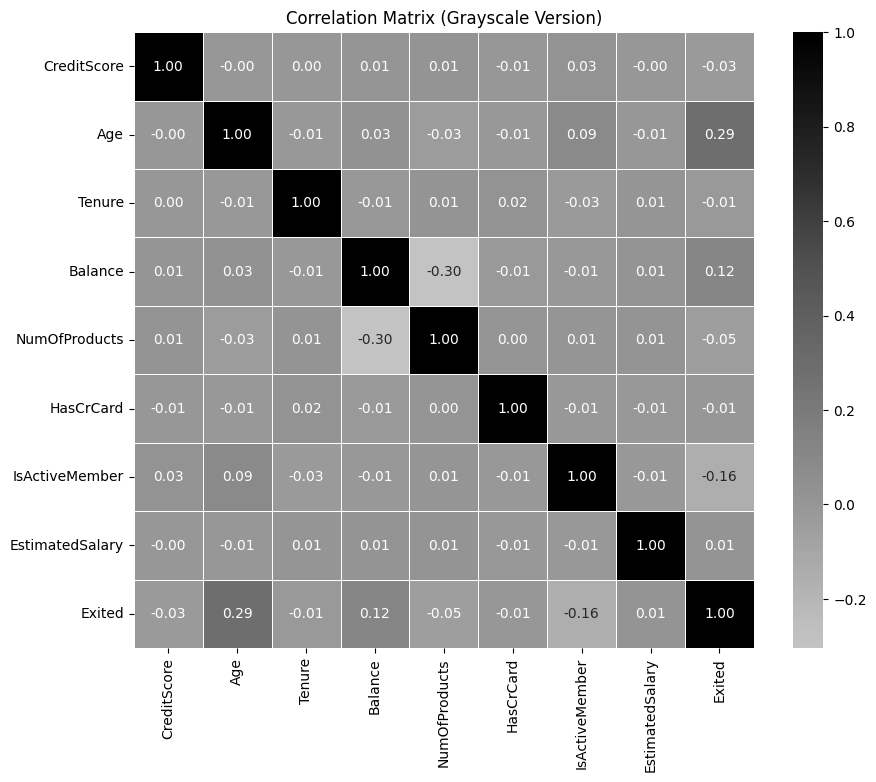

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Greys',   # grayscale
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation Matrix (Grayscale Version)')
plt.show()


## 4. Data Preprocessing

In [9]:
# Drop unnecessary columns
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df_clean['Gender'] = label_encoder.fit_transform(df_clean['Gender'])  # Male=1, Female=0

# One-hot encoding for Geography
df_clean = pd.get_dummies(df_clean, columns=['Geography'], prefix='Geo')

print("Processed Data Shape:", df_clean.shape)
print("\nProcessed Columns:")
print(df_clean.columns.tolist())

Processed Data Shape: (10000, 13)

Processed Columns:
['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geo_France', 'Geo_Germany', 'Geo_Spain']


5. Feature-Target Split & Train-Test Split

In [10]:
# Separate features and target
X = df_clean.drop('Exited', axis=1)
y = df_clean['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Churn rate in training: {y_train.mean():.3f}")
print(f"Churn rate in test: {y_test.mean():.3f}")

Training set: (8000, 12)
Test set: (2000, 12)
Churn rate in training: 0.204
Churn rate in test: 0.203


## 6. Feature Scaling

In [11]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


## 7. Model Training & Evaluation

Let's compare multiple algorithms:


In [12]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train model
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC Score: {auc_score:.4f}")


Logistic Regression:
  Accuracy: 0.7920
  AUC Score: 0.6961

Random Forest:
  Accuracy: 0.8595
  AUC Score: 0.8527

SVM:
  Accuracy: 0.8620
  AUC Score: 0.8291


## 8. Detailed Model Analysis



Best Model: Random Forest

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000


=== CONFUSION MATRIX ===


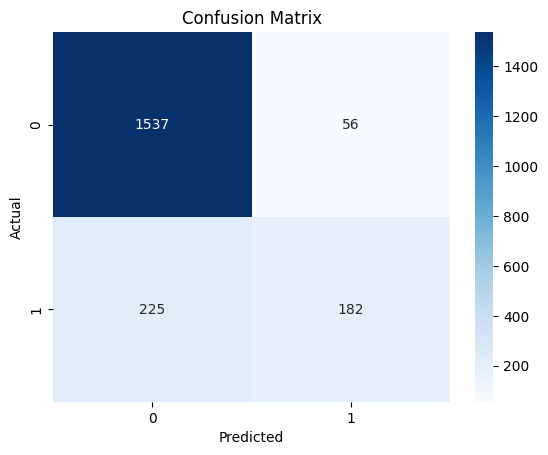

In [13]:
# Find best model based on AUC
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")

# Detailed evaluation of best model
y_pred_best = results[best_model_name]['predictions']
y_pred_proba_best = results[best_model_name]['probabilities']

print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_best))

print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 9. Feature Importance (for Random Forest)

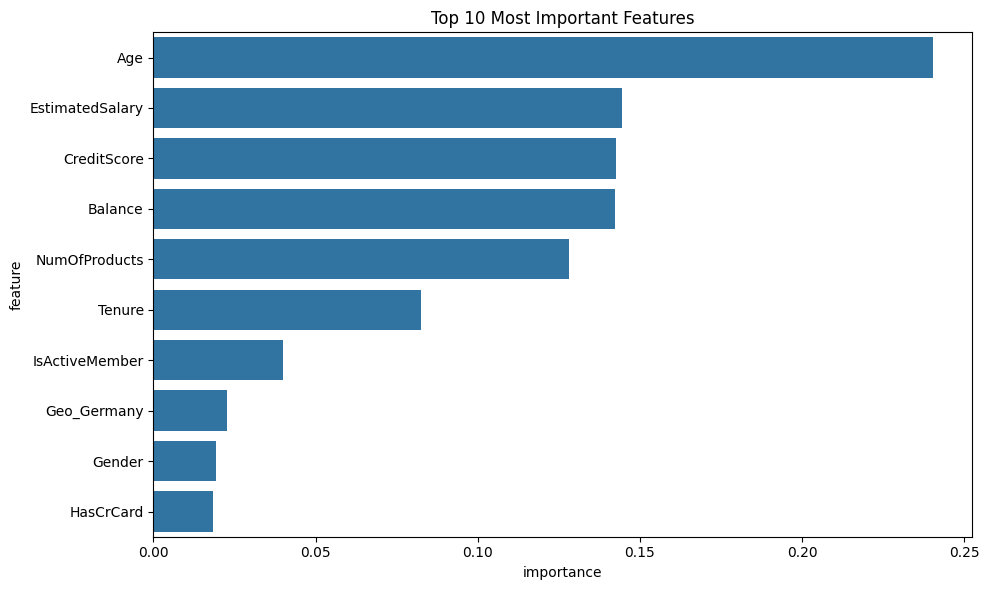

Top 10 Most Important Features:
            feature  importance
2               Age    0.240321
8   EstimatedSalary    0.144367
0       CreditScore    0.142725
4           Balance    0.142318
5     NumOfProducts    0.127995
3            Tenure    0.082605
7    IsActiveMember    0.039820
10      Geo_Germany    0.022699
1            Gender    0.019172
6         HasCrCard    0.018334


In [14]:
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Most Important Features')
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))

10. ROC Curve Comparison

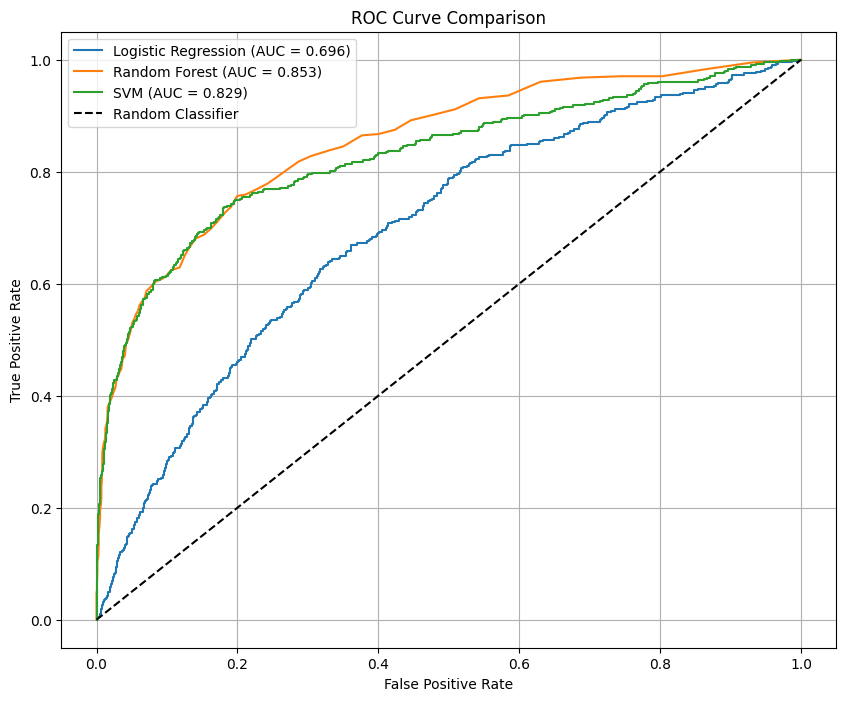

In [15]:
plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

## 11. Business Insights & Recommendations

Based on our analysis:

In [16]:
# Key insights
print("=== KEY BUSINESS INSIGHTS ===")

# Churn rate
churn_rate = df['Exited'].mean()
print(f"1. Overall churn rate: {churn_rate:.1%}")

# Geography impact
geo_churn = df.groupby('Geography')['Exited'].mean()
print(f"\n2. Churn rate by geography:")
for geo, rate in geo_churn.items():
    print(f"   {geo}: {rate:.1%}")

# Gender impact
gender_churn = df.groupby('Gender')['Exited'].mean()
print(f"\n3. Churn rate by gender:")
for gender, rate in gender_churn.items():
    print(f"   {gender}: {rate:.1%}")

# Age analysis
churned_avg_age = df[df['Exited'] == 1]['Age'].mean()
retained_avg_age = df[df['Exited'] == 0]['Age'].mean()
print(f"\n4. Average age:")
print(f"   Churned customers: {churned_avg_age:.1f} years")
print(f"   Retained customers: {retained_avg_age:.1f} years")

# Active member analysis
active_churn = df.groupby('IsActiveMember')['Exited'].mean()
print(f"\n5. Churn rate by activity:")
print(f"   Inactive members: {active_churn[0]:.1%}")
print(f"   Active members: {active_churn[1]:.1%}")

=== KEY BUSINESS INSIGHTS ===
1. Overall churn rate: 20.4%

2. Churn rate by geography:
   France: 16.2%
   Germany: 32.4%
   Spain: 16.7%

3. Churn rate by gender:
   Female: 25.1%
   Male: 16.5%

4. Average age:
   Churned customers: 44.8 years
   Retained customers: 37.4 years

5. Churn rate by activity:
   Inactive members: 26.9%
   Active members: 14.3%


## 12. Model Deployment Ready Code


In [17]:
def predict_churn(customer_data, model, scaler=None):
    """
    Predict churn probability for a new customer
    """
    if scaler:
        customer_data = scaler.transform(customer_data)

    probability = model.predict_proba(customer_data)[0, 1]
    prediction = model.predict(customer_data)[0]

    return {
        'churn_probability': probability,
        'will_churn': bool(prediction),
        'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
    }

# Example usage with test data
if len(X_test) > 0:
    example_customer = X_test.iloc[[0]]  # First test customer
    prediction = predict_churn(example_customer, best_model,
                             scaler if best_model_name == 'SVM' else None)
    print(f"\nExample Prediction: {prediction}")


Example Prediction: {'churn_probability': np.float64(0.07), 'will_churn': False, 'risk_level': 'Low'}


## Summary of Learning Process:

1. **Data Understanding**: Explored dataset structure and target variable
2. **EDA**: Uncovered patterns and relationships in the data
3. **Preprocessing**: Cleaned and prepared data for modeling
4. **Modeling**: Compared multiple algorithms
5. **Evaluation**: Assessed model performance using multiple metrics
6. **Interpretation**: Drew business insights from the results
7. **Deployment**: Created prediction function for new customers

This comprehensive analysis provides a solid foundation for predicting customer churn and offers actionable insights for customer retention strategies!